In [22]:
import shap
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import lime
import lime.lime_tabular

In [3]:
X_train = pd.read_parquet('tmp/X_train.parquet')
X_test = pd.read_parquet('tmp/X_test.parquet')
y_train = pd.read_parquet('tmp/y_train.parquet')
y_test = pd.read_parquet('tmp/y_test.parquet')

y_train = y_train['y_train']
y_test = y_test['y_test']

In [6]:
X_test.reset_index(drop=True, inplace=True)
X_test.head()

,Age,Income,Emp_length,Amount,Rate,Percent_income,Cred_length,Home_MORTGAGE,Home_OTHER,Home_OWN,Home_RENT,Intent_DEBTCONSOLIDATION,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE,Default_N,Default_Y
0,-0.588313,-0.614287,0.292165,0.064952,-1.980293e-01,1.777452,-0.938167,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.115722,-0.033475,-1.156213,0.064952,1.314128e+00,-0.095556,1.034735,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.273252,0.095594,1.257751,1.014021,3.067403e-16,0.466346,-0.691554,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.745843,-0.614352,0.533562,0.064952,3.067403e-16,1.777452,-0.938167,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.356869,-0.348082,-0.673420,0.539487,1.638161e+00,1.121899,0.048284,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


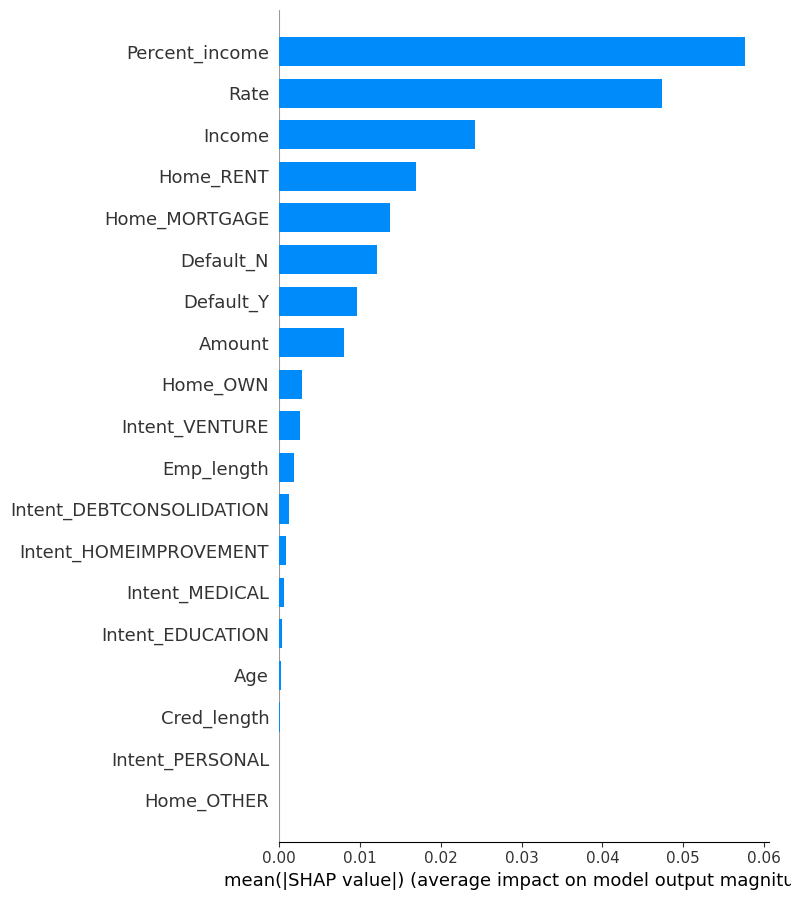

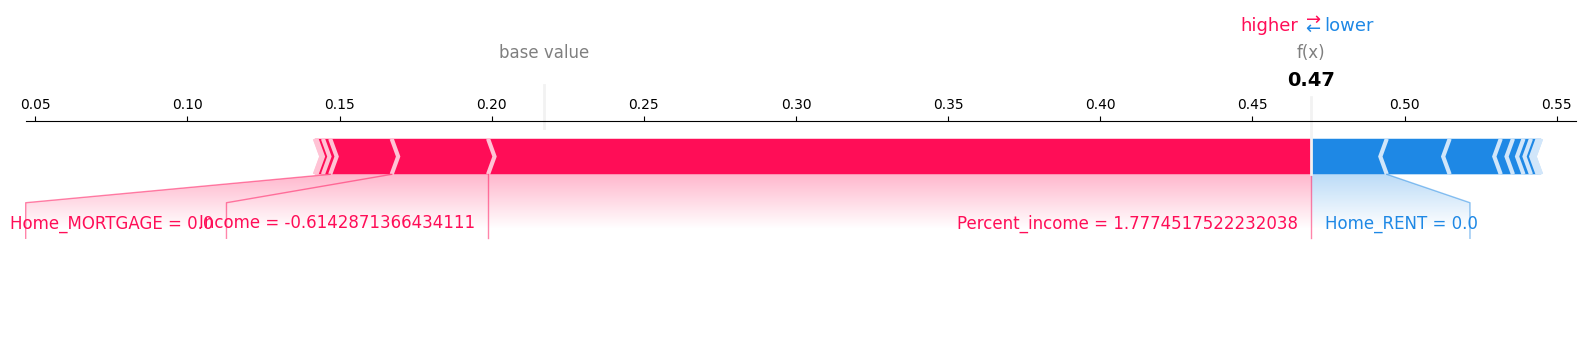

In [19]:
# Apply SHAP
rf_model = joblib.load('best_random_forest_model.pkl')

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Visualize global feature importance (summary plot)
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

# Visualize individual prediction explanation
index = 0  # Index of the sample to explain
shap.force_plot(explainer.expected_value[1], shap_values[1][index], X_test.iloc[index], matplotlib=True)


In [25]:
X_test

,Age,Income,Emp_length,Amount,Rate,Percent_income,Cred_length,Home_MORTGAGE,Home_OTHER,Home_OWN,Home_RENT,Intent_DEBTCONSOLIDATION,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE,Default_N,Default_Y
0,-0.588313,-0.614287,0.292165,0.064952,-1.980293e-01,1.777452,-0.938167,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.115722,-0.033475,-1.156213,0.064952,1.314128e+00,-0.095556,1.034735,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.273252,0.095594,1.257751,1.014021,3.067403e-16,0.466346,-0.691554,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.745843,-0.614352,0.533562,0.064952,3.067403e-16,1.777452,-0.938167,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.356869,-0.348082,-0.673420,0.539487,1.638161e+00,1.121899,0.048284,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6512,1.459582,0.353733,3.671714,0.053089,3.067403e-16,-0.563808,2.514412,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6513,-0.273252,-0.033475,-0.673420,-1.042294,3.067403e-16,-1.125710,-0.444942,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6514,-0.745843,0.773209,-0.190627,0.064952,3.067403e-16,-0.751109,-0.938167,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6515,-0.588313,0.547337,-0.914816,-0.567760,3.067403e-16,-1.032060,-0.691554,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
X_test.values.shape

(6517, 19)

In [35]:
# Initialize LIME
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_test.values,
    feature_names=X_test.columns,
    class_names=[str(c) for c in y_test.unique()],
    mode='classification'
)

lr_model = joblib.load('best_logistic_regression_model.pkl')

# Select a single data point to explain
i = 0  # Index of the test sample
exp = explainer.explain_instance(X_test.values[0], lr_model.predict_proba, num_features=5)

# Show explanation
exp.show_in_notebook(show_table=True)

# Optional: Save explanation as HTML and visualize
exp.save_to_file('lime_explanation.html')


Trying to unpickle estimator LogisticRegression from version 1.3.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
X does not have valid feature names, but LogisticRegression was fitted with feature names
